In [1]:
import torch
import torch.nn as nn
import numpy as np
from gensim.models import KeyedVectors
from main import run

hello


In [2]:
def load_glove_embeddings(file_path, word_to_index, embedding_dim):
    embeddings = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings[word] = coefs

    num_words = len(word_to_index) + 1  # add 1 for the padding token
    embedding_matrix = np.zeros((num_words, embedding_dim))

    for word, index in word_to_index.items():
        if (embedding := embeddings.get(word)) is not None:
            embedding_matrix[index] = embedding
        else:
            embedding_matrix[index] = embeddings.get("<unk>", np.zeros(embedding_dim))

    return embedding_matrix

In [3]:
def load_word2vec_embeddings(file_path, word_to_index, embedding_dim):
    model = KeyedVectors.load_word2vec_format(file_path, binary=True)
    embedding_matrix = np.zeros((len(word_to_index) + 1, embedding_dim))

    for word, index in word_to_index.items():
        embedding_matrix[index] = (
            model[word] if word in model else np.zeros(embedding_dim)
        )

    return embedding_matrix

In [4]:
def load_fasttext_embeddings(embedding_file, word_index, embedding_dim):
    embeddings_index = {}
    with open(embedding_file, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [5]:
class Rnn(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Rnn, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.rnn = nn.RNN(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.rnn(x)
        output = self.fc(output)
        return output

In [6]:
class Lstm(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Lstm, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.lstm = nn.LSTM(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

In [7]:
class Gru(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size, embedding_dim):
        super(Gru, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(
            torch.FloatTensor(embedding_matrix), padding_idx=0
        )
        self.gru = nn.GRU(
            input_size=embedding_dim, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

Epoch: 20/20
Validation Loss: 0.2443
Validation Macro F1: 0.2286
Training Macro F1: 0.2741


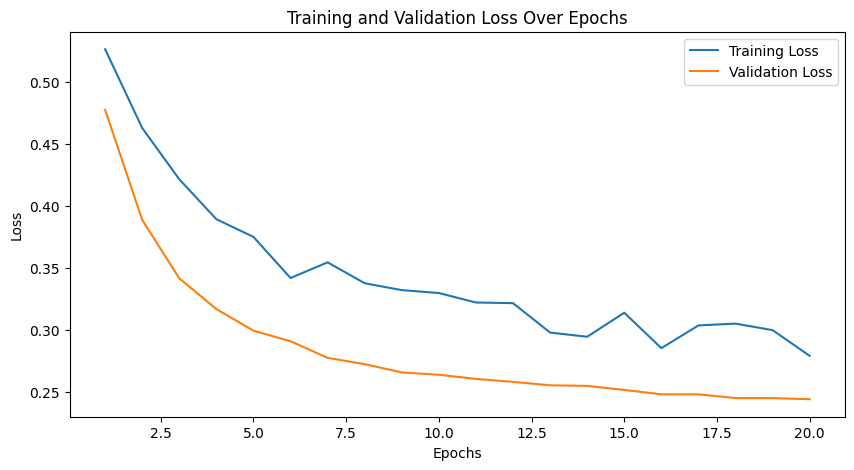

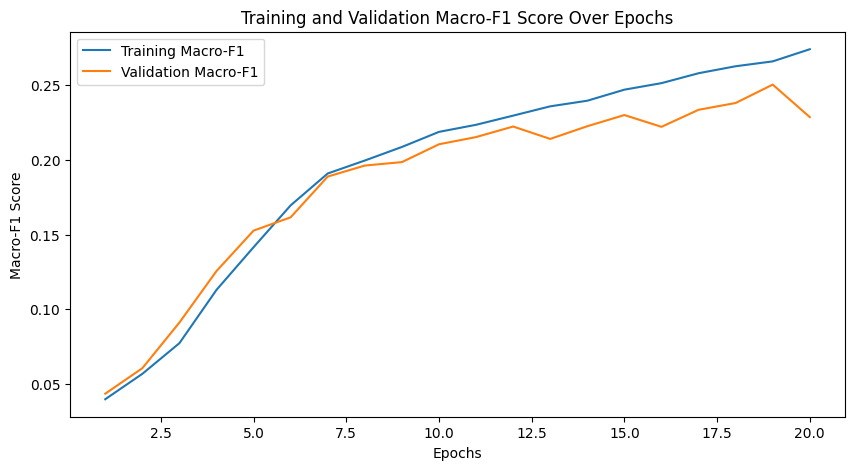

Final Test Accuracy: 0.9367
Final Test Macro F1: 0.2398
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.95      0.99      0.97     56540
       B_COURT       0.00      0.00      0.00       177
       I_COURT       0.58      0.05      0.09       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.85      0.76      0.80       221
        I_DATE       0.72      0.66      0.69       102
         B_ORG       0.00      0.00      0.00       159
         I_ORG       0.00      0.00      0.00       308
         B_GPE       0.36      0.02      0.04       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [10]:
run(
    load_glove_embeddings,
    300,
    "../word_embeddings/glove.6B.300d.txt",
    Rnn,
    "rnn_glove_300",
    20,
)

Epoch: 20/20
Validation Loss: 0.1674
Validation Macro F1: 0.4084
Training Macro F1: 0.4371


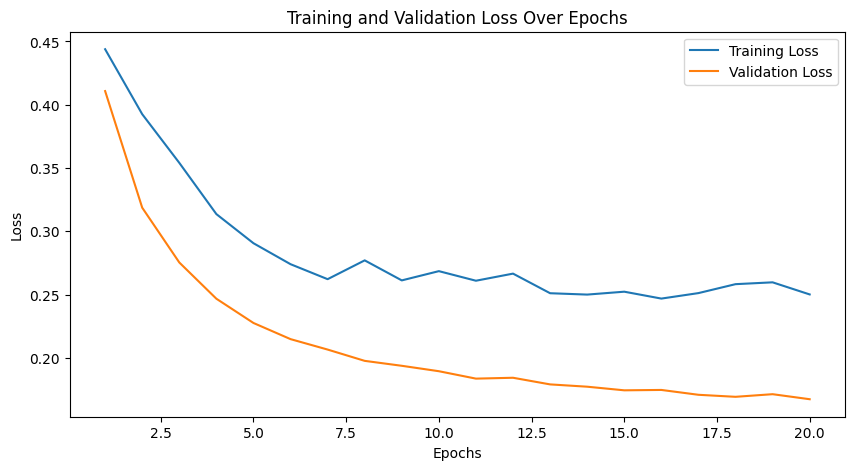

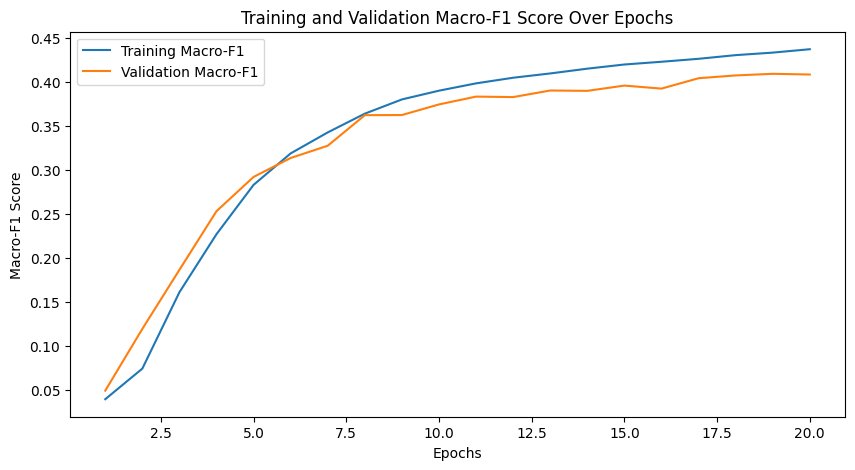

Final Test Accuracy: 0.9533
Final Test Macro F1: 0.4026
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.88      0.68      0.77       177
       I_COURT       0.78      0.71      0.74       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.85      0.78      0.81       221
        I_DATE       0.60      0.76      0.67       102
         B_ORG       0.44      0.14      0.22       159
         I_ORG       0.50      0.21      0.30       308
         B_GPE       0.51      0.26      0.34       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [12]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Rnn,
    "rnn_word2vec",
    20,
)

Epoch: 20/20
Validation Loss: 0.1445
Validation Macro F1: 0.4507
Training Macro F1: 0.4744


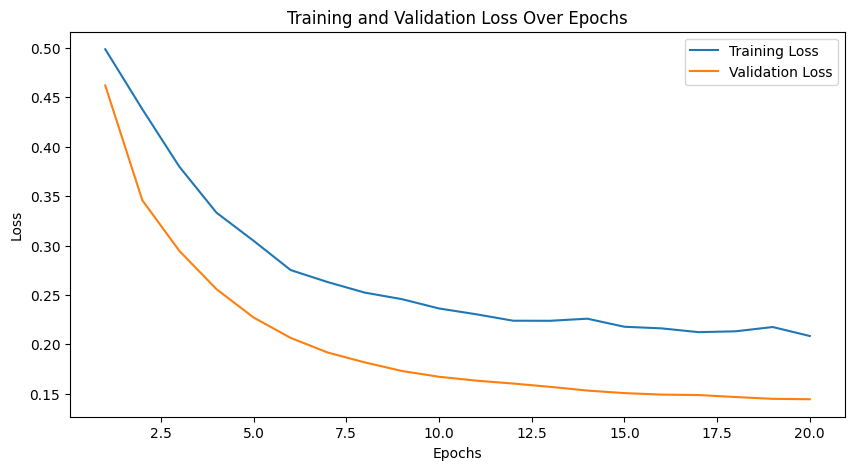

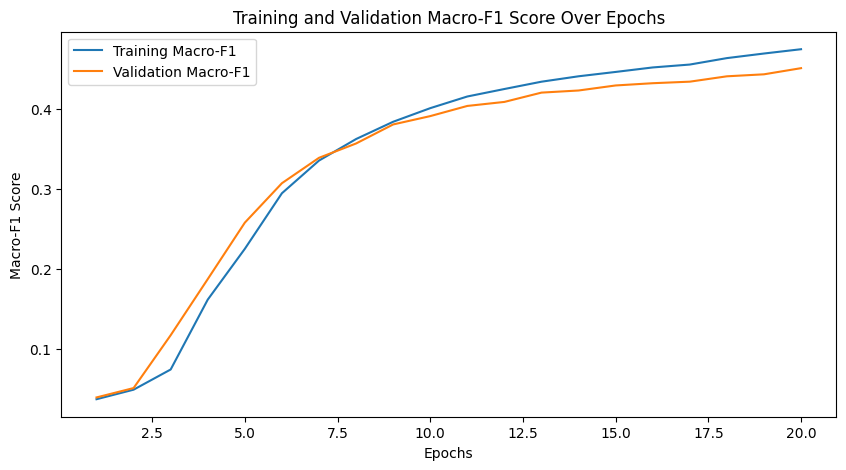

Final Test Accuracy: 0.9582
Final Test Macro F1: 0.4371
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.87      0.73      0.79       177
       I_COURT       0.81      0.69      0.74       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.86      0.81      0.83       221
        I_DATE       0.85      0.90      0.88       102
         B_ORG       0.61      0.17      0.27       159
         I_ORG       0.52      0.26      0.35       308
         B_GPE       0.56      0.27      0.36       179
         I_GPE       0.33      0.02      0.04        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [13]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Rnn,
    "rnn_fasttext",
    20,
)

Epoch: 20/20
Validation Loss: 0.1623
Validation Macro F1: 0.4231
Training Macro F1: 0.4549


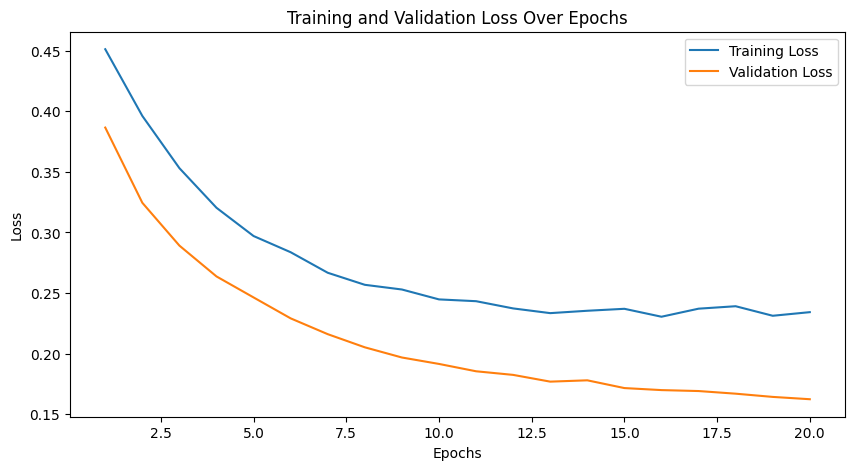

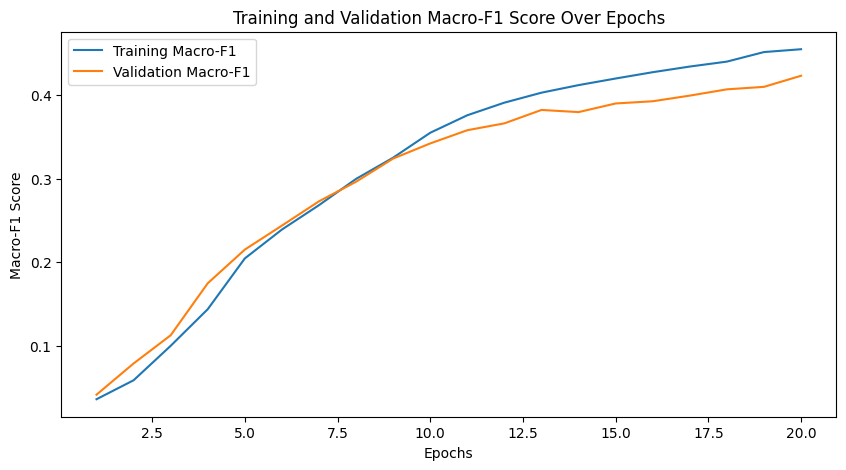

Final Test Accuracy: 0.9537
Final Test Macro F1: 0.4058
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.87      0.71      0.78       177
       I_COURT       0.74      0.69      0.71       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.89      0.78      0.83       221
        I_DATE       0.59      0.72      0.65       102
         B_ORG       0.70      0.18      0.28       159
         I_ORG       0.53      0.30      0.38       308
         B_GPE       0.50      0.25      0.33       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [14]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Lstm,
    "lstm_word2vec",
    20,
)

Epoch: 20/20
Validation Loss: 0.1410
Validation Macro F1: 0.4492
Training Macro F1: 0.4713


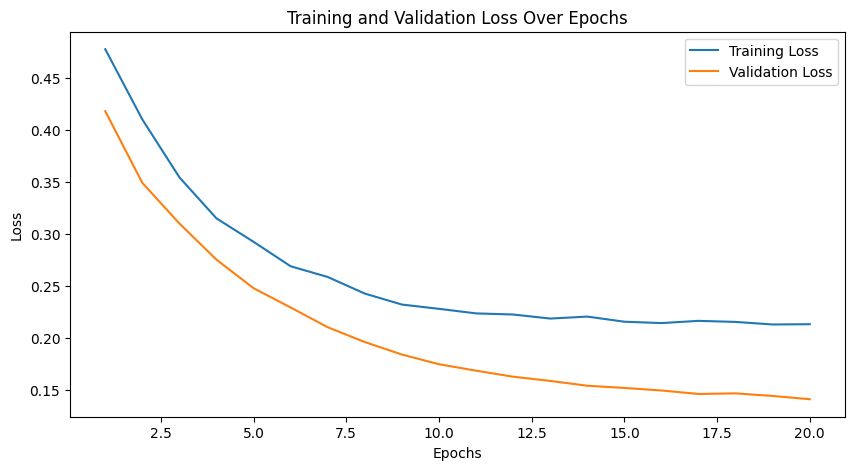

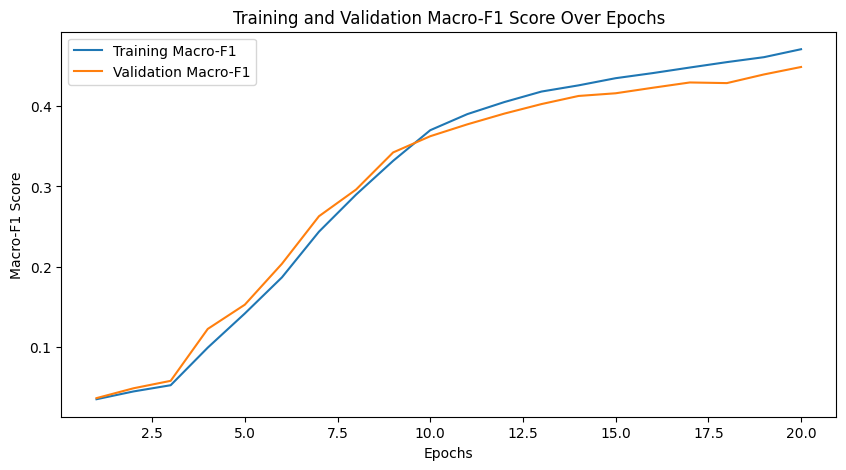

Final Test Accuracy: 0.9592
Final Test Macro F1: 0.4341
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.91      0.71      0.79       177
       I_COURT       0.79      0.69      0.74       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.85      0.85      0.85       221
        I_DATE       0.84      0.83      0.84       102
         B_ORG       0.69      0.14      0.23       159
         I_ORG       0.50      0.39      0.44       308
         B_GPE       0.65      0.23      0.34       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [15]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Lstm,
    "lstm_fasttext",
    20,
)

Epoch: 20/20
Validation Loss: 0.1547
Validation Macro F1: 0.4737
Training Macro F1: 0.5245


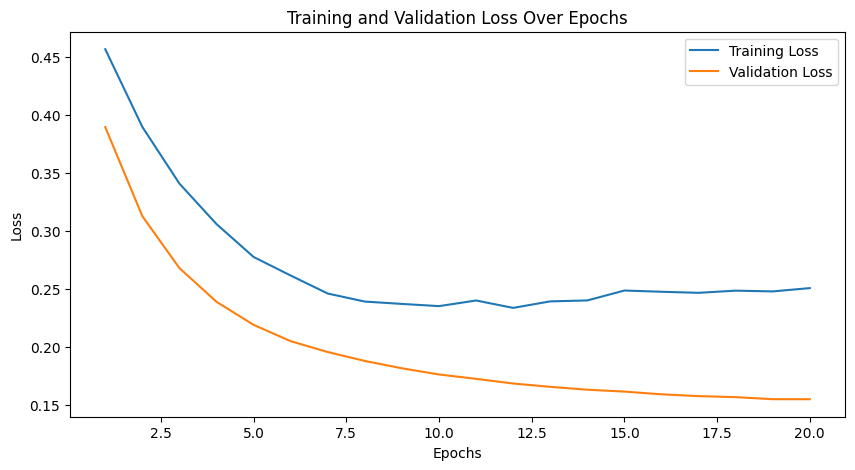

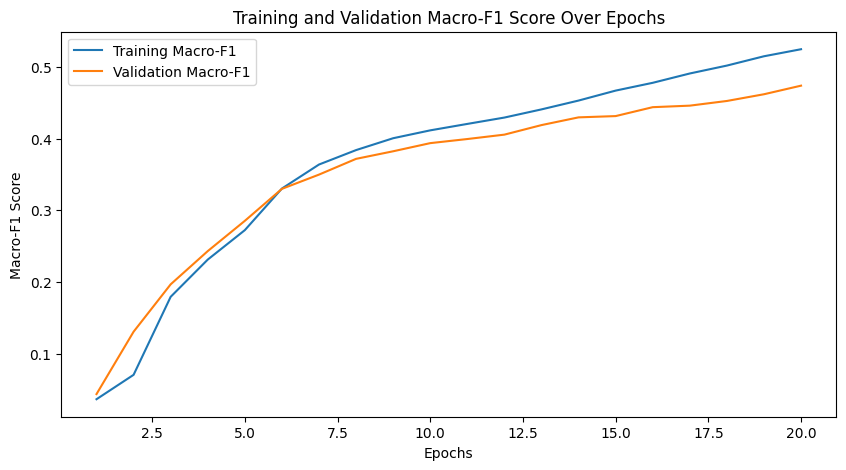

Final Test Accuracy: 0.9549
Final Test Macro F1: 0.4499
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.88      0.69      0.78       177
       I_COURT       0.84      0.73      0.78       324
  B_PETITIONER       0.50      0.11      0.18         9
  I_PETITIONER       1.00      0.09      0.17        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.25      0.12      0.17         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.82      0.79      0.80       221
        I_DATE       0.73      0.65      0.68       102
         B_ORG       0.55      0.18      0.27       159
         I_ORG       0.61      0.38      0.47       308
         B_GPE       0.50      0.23      0.32       179
         I_GPE       1.00      0.02      0.05        43
     B_ST

In [16]:
run(
    load_word2vec_embeddings,
    300,
    "../word_embeddings/GoogleNews-vectors-negative300.bin",
    Gru,
    "gru_word2vec",
    20,
)

Epoch: 20/20
Validation Loss: 0.1368
Validation Macro F1: 0.4664
Training Macro F1: 0.5033


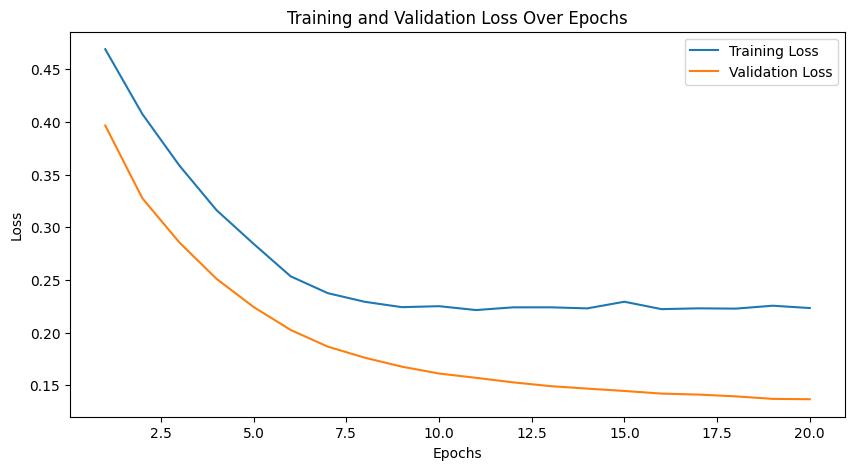

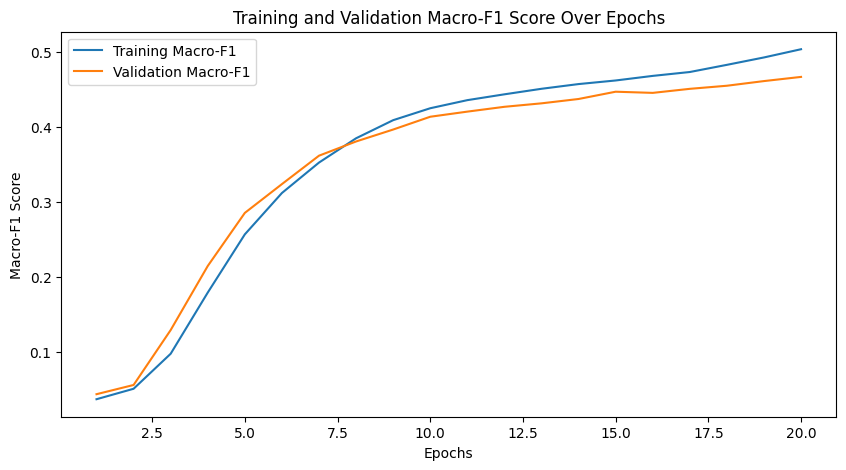

Final Test Accuracy: 0.9600
Final Test Macro F1: 0.4426
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.97      0.99      0.98     56540
       B_COURT       0.90      0.68      0.78       177
       I_COURT       0.83      0.71      0.76       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.87      0.83      0.85       221
        I_DATE       0.92      0.87      0.89       102
         B_ORG       0.69      0.14      0.23       159
         I_ORG       0.60      0.33      0.43       308
         B_GPE       0.60      0.29      0.39       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [17]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/wiki-news-300d-1M.vec",
    Gru,
    "gru_fasttext",
    20,
)

Epoch: 20/20
Validation Loss: 0.2350
Validation Macro F1: 0.2845
Training Macro F1: 0.3100


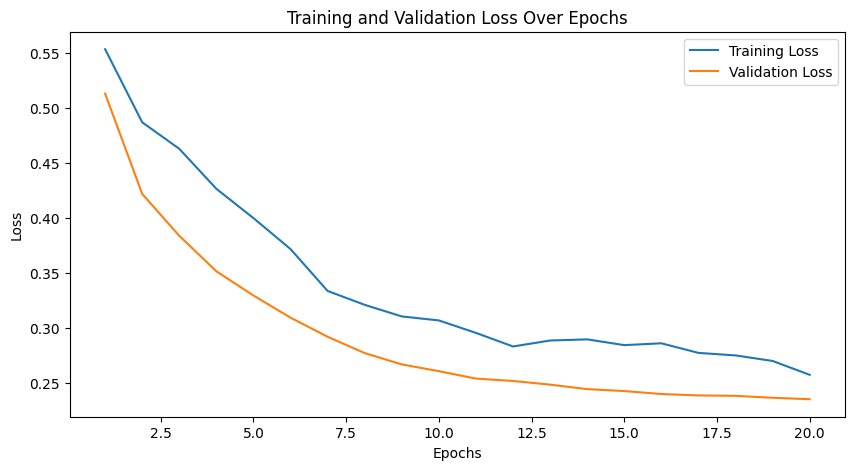

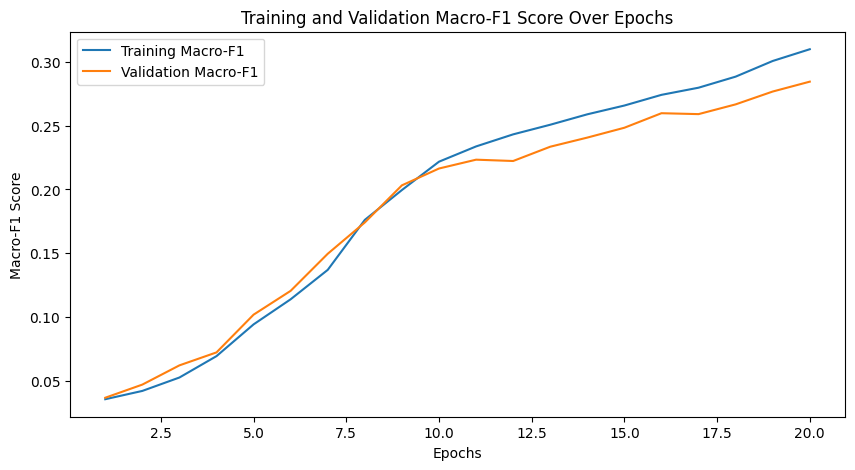

Final Test Accuracy: 0.9380
Final Test Macro F1: 0.2814
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.95      0.99      0.97     56540
       B_COURT       0.46      0.10      0.17       177
       I_COURT       0.49      0.33      0.39       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.00      0.00      0.00        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.84      0.77      0.80       221
        I_DATE       0.60      0.69      0.64       102
         B_ORG       0.00      0.00      0.00       159
         I_ORG       0.42      0.03      0.05       308
         B_GPE       0.41      0.07      0.12       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [18]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/glove.6B.300d.txt",
    Lstm,
    "lstm_glove",
    20,
)

Epoch: 20/20
Validation Loss: 0.2310
Validation Macro F1: 0.3090
Training Macro F1: 0.3451


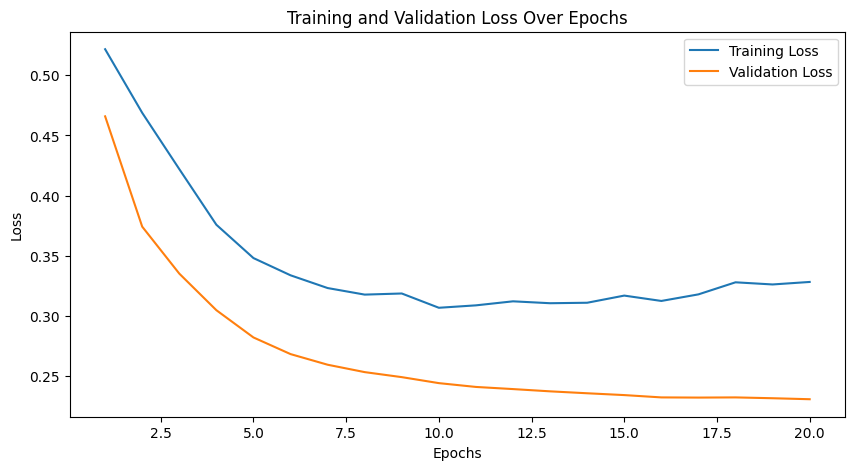

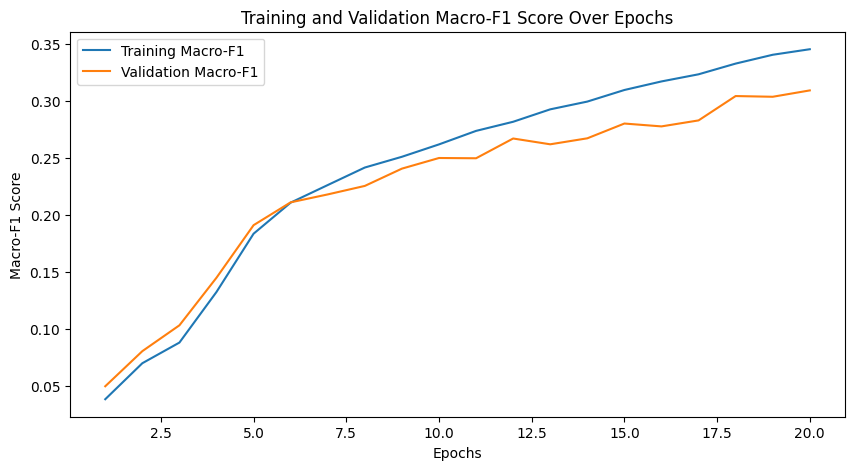

Final Test Accuracy: 0.9390
Final Test Macro F1: 0.3098
Classification Report for Test Data:
                 precision    recall  f1-score   support

             O       0.95      0.99      0.97     56540
       B_COURT       0.49      0.19      0.28       177
       I_COURT       0.52      0.33      0.41       324
  B_PETITIONER       0.00      0.00      0.00         9
  I_PETITIONER       0.25      0.09      0.13        11
  B_RESPONDENT       0.00      0.00      0.00         5
  I_RESPONDENT       0.00      0.00      0.00         8
       B_JUDGE       0.00      0.00      0.00         8
       I_JUDGE       0.00      0.00      0.00         6
        B_DATE       0.82      0.79      0.81       221
        I_DATE       0.66      0.75      0.70       102
         B_ORG       0.00      0.00      0.00       159
         I_ORG       0.49      0.10      0.16       308
         B_GPE       0.44      0.08      0.14       179
         I_GPE       0.00      0.00      0.00        43
     B_ST

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [19]:
run(
    load_fasttext_embeddings,
    300,
    "../word_embeddings/glove.6B.300d.txt",
    Gru,
    "gru_glove",
    20,
)